In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [5]:
# 2. Convert the June temperatures to a list.
results_june_list = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(results_june_list)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results_june_list, columns=['Date', 'June Temps'])
june_df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
results_dec_list = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(results_dec_list)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results_dec_list, columns=['Date', 'December Temps'])
dec_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

## Temperature Visualizations

In [14]:
import matplotlib.pyplot as plt
import datetime as dt

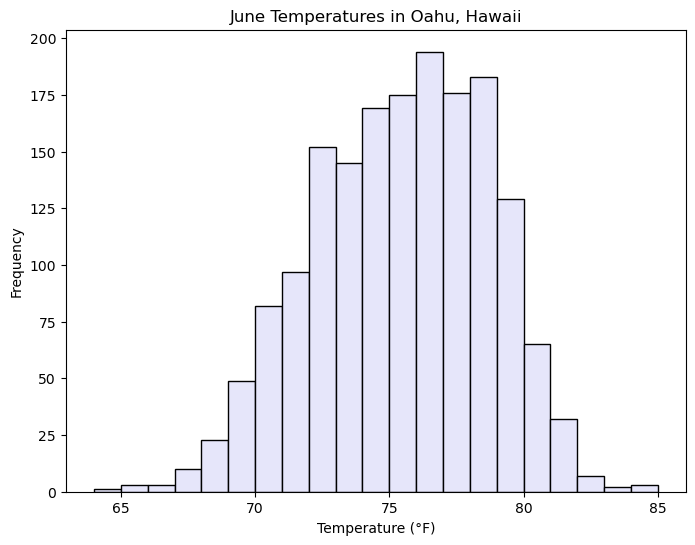

In [15]:
june_df.plot.hist(bins=21, color='lavender', edgecolor='black', legend=None, figsize=(8, 6))
plt.xlabel("Temperature (°F)")
plt.title("June Temperatures in Oahu, Hawaii")
plt.show()

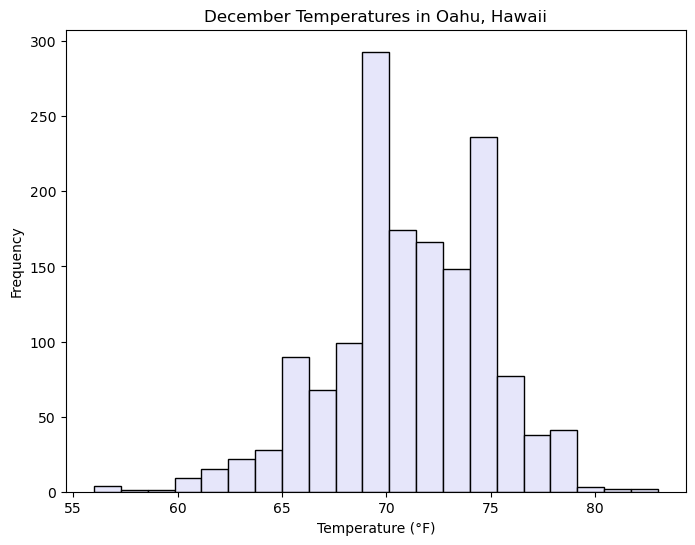

In [16]:
dec_df.plot.hist(bins=21, color='lavender', edgecolor='black', legend=None, figsize=(8, 6))
plt.xlabel("Temperature (°F)")
plt.title("December Temperatures in Oahu, Hawaii")
plt.show()

In [17]:
june_plot = pd.DataFrame(june_df)
june_plot['Date'] = pd.to_datetime(june_plot['Date'])

june_2010_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2010].groupby(june_plot['Date'])['June Temps'].mean())
june_2011_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2011].groupby(june_plot['Date'])['June Temps'].mean())
june_2012_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2012].groupby(june_plot['Date'])['June Temps'].mean())
june_2013_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2013].groupby(june_plot['Date'])['June Temps'].mean())
june_2014_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2014].groupby(june_plot['Date'])['June Temps'].mean())
june_2015_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2015].groupby(june_plot['Date'])['June Temps'].mean())
june_2016_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2016].groupby(june_plot['Date'])['June Temps'].mean())
june_2017_df = pd.DataFrame(june_plot[june_plot['Date'].dt.year == 2017].groupby(june_plot['Date'])['June Temps'].mean())

june_plot_clean = june_2010_df
june_plot_clean.reset_index(inplace=True)
june_plot_clean['Date'] = june_plot_clean['Date'].dt.day
june_plot_clean.rename(columns={'Date': 'Day in June', 'June Temps': '2010'}, inplace=True)
june_plot_clean['Day in June'] = june_plot_clean['Day in June'].astype("int64")

june_2011_df.reset_index(inplace=True)
june_2012_df.reset_index(inplace=True)
june_2013_df.reset_index(inplace=True)
june_2014_df.reset_index(inplace=True)
june_2015_df.reset_index(inplace=True)
june_2016_df.reset_index(inplace=True)
june_2017_df.reset_index(inplace=True)
june_plot_clean['2011'] = june_2011_df['June Temps']
june_plot_clean['2012'] = june_2012_df['June Temps']
june_plot_clean['2013'] = june_2013_df['June Temps']
june_plot_clean['2014'] = june_2014_df['June Temps']
june_plot_clean['2015'] = june_2015_df['June Temps']
june_plot_clean['2016'] = june_2016_df['June Temps']
june_plot_clean['2017'] = june_2017_df['June Temps']
june_plot_clean.head()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
0,1,73.555556,73.875,72.875000,78.166667,76.571429,74.666667,70.714286,78.166667
1,2,74.555556,75.000,74.000000,76.000000,74.625000,72.600000,70.285714,78.166667
2,3,74.444444,69.625,75.333333,76.125000,74.428571,73.857143,72.000000,77.333333
3,4,72.888889,69.500,73.571429,76.125000,75.125000,72.714286,70.500000,78.500000
4,5,76.000000,74.000,73.000000,75.625000,75.428571,73.857143,72.400000,77.428571


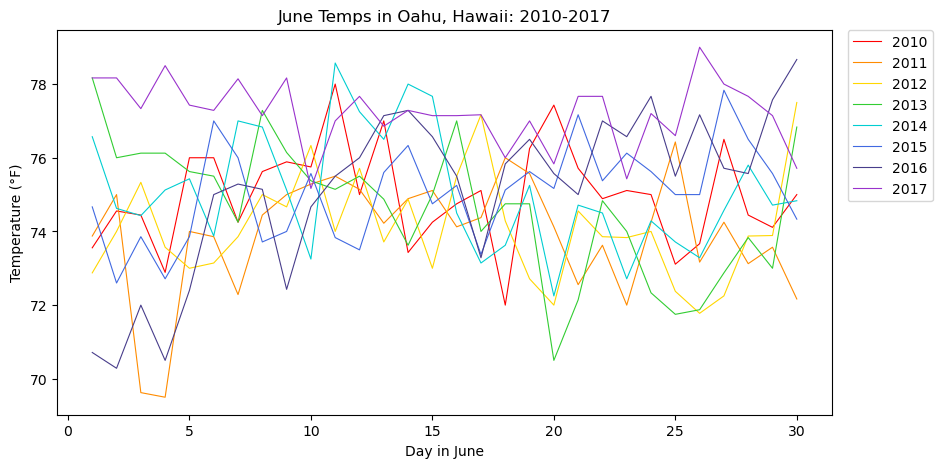

In [18]:
colors = ['red', 'darkorange', 'gold', 'limegreen', 'darkturquoise', 'royalblue', 'darkslateblue', 'darkorchid']
june_plot_clean.plot('Day in June', ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], figsize = (10, 5), linewidth=0.8, color=colors)
plt.title("June Temps in Oahu, Hawaii: 2010-2017")
plt.xlabel("Day in June")
plt.ylabel("Temperature (°F)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [19]:
june_plot_clean.describe()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,74.990807,73.902447,74.088757,74.640476,75.071706,75.035635,75.134762,77.222698
std,8.803408,1.353783,1.613059,1.410667,1.809700,1.615347,1.288383,2.215122,0.901377
min,1.000000,72.000000,69.500000,71.777778,70.500000,72.250000,72.600000,70.285714,75.166667
25%,8.250000,74.250000,73.267857,73.035714,73.677083,73.977679,73.892857,74.750000,77.000000
50%,15.500000,75.000000,74.173611,73.881944,74.854167,74.714286,75.145833,75.535714,77.242857
75%,22.750000,75.854167,75.000000,74.822917,75.906250,76.325000,75.625000,76.571429,77.666667
max,30.000000,78.000000,76.428571,77.500000,78.166667,78.571429,77.833333,78.666667,79.000000


In [20]:
dec_plot = pd.DataFrame(dec_df)
dec_plot['Date'] = pd.to_datetime(dec_plot['Date'])

dec_2010_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2010].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2011_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2011].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2012_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2012].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2013_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2013].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2014_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2014].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2015_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2015].groupby(dec_plot['Date'])['December Temps'].mean())
dec_2016_df = pd.DataFrame(dec_plot[dec_plot['Date'].dt.year == 2016].groupby(dec_plot['Date'])['December Temps'].mean())

dec_plot_clean = dec_2010_df
dec_plot_clean.reset_index(inplace=True)
dec_plot_clean['Date'] = dec_plot_clean['Date'].dt.day ##
dec_plot_clean.rename(columns={'Date': 'Day in December', 'December Temps': '2010'}, inplace=True)
dec_plot_clean['Day in December'] = dec_plot_clean['Day in December'].astype("int64")

dec_2011_df.reset_index(inplace=True)
dec_2012_df.reset_index(inplace=True)
dec_2013_df.reset_index(inplace=True)
dec_2014_df.reset_index(inplace=True)
dec_2015_df.reset_index(inplace=True)
dec_2016_df.reset_index(inplace=True)

dec_plot_clean['2011'] = dec_2011_df['December Temps']
dec_plot_clean['2012'] = dec_2012_df['December Temps']
dec_plot_clean['2013'] = dec_2013_df['December Temps']
dec_plot_clean['2014'] = dec_2014_df['December Temps']
dec_plot_clean['2015'] = dec_2015_df['December Temps']
dec_plot_clean['2016'] = dec_2016_df['December Temps']
dec_plot_clean.head()

,Day in December,2010,2011,2012,2013,2014,2015,2016
0,1,73.125000,68.750000,70.166667,73.166667,71.625,73.600000,73.714286
1,2,72.500000,69.125000,71.500000,70.500000,70.625,73.142857,72.285714
2,3,71.875000,72.428571,76.222222,72.625000,70.250,74.714286,71.500000
3,4,74.857143,72.285714,70.750000,68.750000,70.500,76.142857,73.000000
4,5,71.285714,71.375000,72.625000,68.250000,71.625,72.600000,69.142857


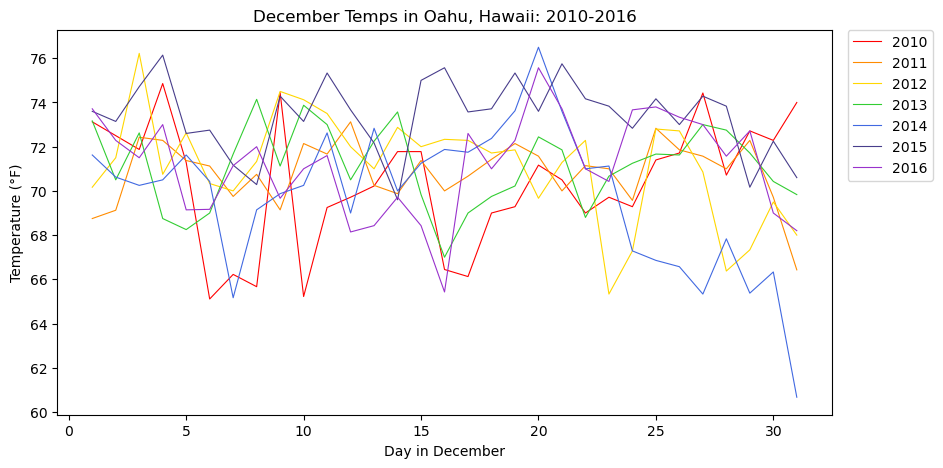

In [21]:
colors = ['red', 'darkorange', 'gold', 'limegreen', 'royalblue', 'darkslateblue', 'darkorchid']
dec_plot_clean.plot('Day in December', ['2010', '2011', '2012', '2013', '2014', '2015', '2016'], figsize = (10, 5), linewidth=0.8, color=colors)
plt.title("December Temps in Oahu, Hawaii: 2010-2016")
plt.xlabel("Day in December")
plt.ylabel("Temperature (°F)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [22]:
dec_plot_clean.describe()

,Day in December,2010,2011,2012,2013,2014,2015,2016
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,70.349373,70.850998,71.114772,71.105300,69.783948,73.363671,71.169278
std,9.092121,2.789991,1.410248,2.396018,1.792140,3.197026,1.681494,2.226640
min,1.000000,65.111111,66.428571,65.333333,67.000000,60.666667,69.600000,65.428571
25%,8.500000,69.125000,69.937500,70.083333,69.833333,67.559524,72.675000,69.416667
50%,16.000000,70.714286,71.125000,71.500000,71.250000,70.428571,73.600000,71.500000
75%,23.500000,72.080357,71.761905,72.479167,72.534722,71.687500,74.285714,72.857143
max,31.000000,74.857143,73.125000,76.222222,74.142857,76.500000,76.142857,75.571429


## Precipitation Visualizations

In [23]:
results = []
results_june_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6)
results_dec_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12)
june_rain_df = pd.DataFrame(results_june_rain, columns=['Date', 'Precipitation'])
dec_rain_df = pd.DataFrame(results_dec_rain, columns=['Date', 'Precipitation'])

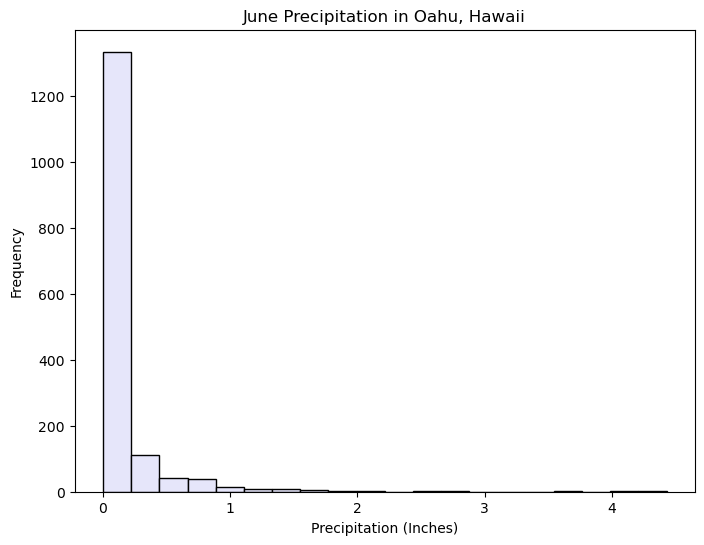

In [24]:
june_rain_df.plot.hist(bins=20, color='lavender', edgecolor='black', legend=None, figsize=(8, 6))
june_rain_df.plot
plt.xlabel("Precipitation (Inches)")
plt.title("June Precipitation in Oahu, Hawaii")
plt.show()

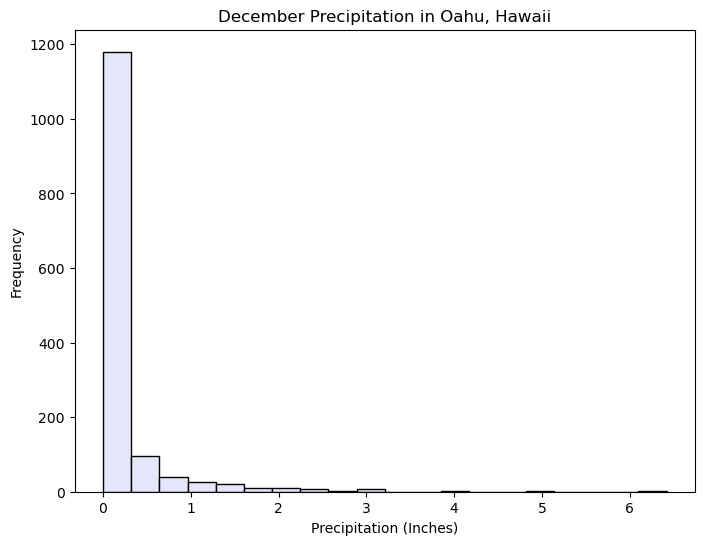

In [25]:
dec_rain_df.plot.hist(bins=20, color='lavender', edgecolor='black', legend=None, figsize=(8, 6))
dec_rain_df.plot
plt.xlabel("Precipitation (Inches)")
plt.title("December Precipitation in Oahu, Hawaii")
plt.show()

In [26]:
june_rain_plot = pd.DataFrame(june_rain_df)
june_rain_plot['Date'] = pd.to_datetime(june_rain_plot['Date'])

june_2010_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2010].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2011_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2011].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2012_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2012].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2013_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2013].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2014_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2014].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2015_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2015].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2016_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2016].groupby(june_rain_plot['Date'])['Precipitation'].mean())
june_2017_rain_df = pd.DataFrame(june_rain_plot[june_rain_plot['Date'].dt.year == 2017].groupby(june_rain_plot['Date'])['Precipitation'].mean())

june_rain_plot_clean = june_2010_rain_df
june_rain_plot_clean.reset_index(inplace=True)
june_rain_plot_clean['Date'] = june_rain_plot_clean['Date'].dt.day
june_rain_plot_clean.rename(columns={'Date': 'Day in June', 'Precipitation': '2010'}, inplace=True)
june_rain_plot_clean['Day in June'] = june_rain_plot_clean['Day in June'].astype("int64")

june_2011_rain_df.reset_index(inplace=True)
june_2012_rain_df.reset_index(inplace=True)
june_2013_rain_df.reset_index(inplace=True)
june_2014_rain_df.reset_index(inplace=True)
june_2015_rain_df.reset_index(inplace=True)
june_2016_rain_df.reset_index(inplace=True)
june_2017_rain_df.reset_index(inplace=True)
june_rain_plot_clean['2011'] = june_2011_rain_df['Precipitation']
june_rain_plot_clean['2012'] = june_2012_rain_df['Precipitation']
june_rain_plot_clean['2013'] = june_2013_rain_df['Precipitation']
june_rain_plot_clean['2014'] = june_2014_rain_df['Precipitation']
june_rain_plot_clean['2015'] = june_2015_rain_df['Precipitation']
june_rain_plot_clean['2016'] = june_2016_rain_df['Precipitation']
june_rain_plot_clean['2017'] = june_2017_rain_df['Precipitation']
june_rain_plot_clean.head()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
0,1,0.018750,0.184286,0.057500,0.138333,0.055000,0.520000,0.723333,0.006667
1,2,0.007778,0.096250,0.061667,0.180000,0.217143,0.058000,0.295000,0.068000
2,3,0.026667,0.887500,0.000000,0.101667,0.028571,0.001667,0.128333,0.122000
3,4,0.001111,1.666667,0.003333,0.004286,0.016667,0.417143,0.005000,0.191667
4,5,0.011250,1.441667,0.000000,0.002500,0.006667,0.032857,0.247500,0.013333


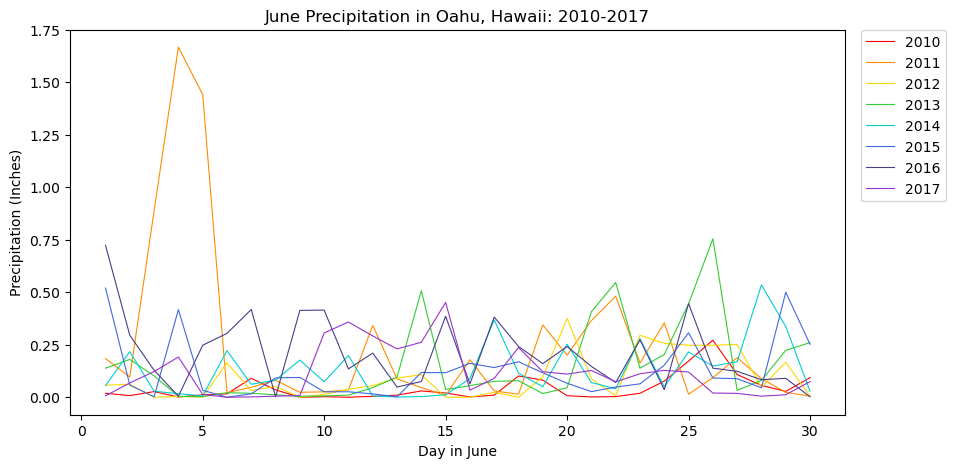

In [27]:
colors = ['red', 'darkorange', 'gold', 'limegreen', 'darkturquoise', 'royalblue', 'darkslateblue', 'darkorchid']
june_rain_plot_clean.plot('Day in June', ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], figsize = (10, 5), linewidth=0.8, color=colors)
plt.title("June Precipitation in Oahu, Hawaii: 2010-2017")
plt.xlabel("Day in June")
plt.ylabel("Precipitation (Inches)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [28]:
june_rain_plot_clean.describe()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.043464,0.251237,0.092712,0.151552,0.130091,0.125512,0.210077,0.119904
std,8.803408,0.060641,0.402274,0.106862,0.192804,0.129472,0.140415,0.169786,0.120510
min,1.000000,0.000000,0.005000,0.000000,0.002500,0.001250,0.000000,0.001667,0.000000
25%,8.250000,0.005000,0.026786,0.005536,0.019375,0.031429,0.028214,0.077083,0.014583
50%,15.500000,0.018819,0.090952,0.053333,0.077232,0.077708,0.089881,0.153333,0.100000
75%,22.750000,0.071563,0.306250,0.149286,0.197500,0.211429,0.149688,0.301750,0.175750
max,30.000000,0.271667,1.666667,0.375714,0.754286,0.535000,0.520000,0.723333,0.451667


In [29]:
dec_rain_plot = pd.DataFrame(dec_rain_df)
dec_rain_plot['Date'] = pd.to_datetime(dec_rain_plot['Date'])

dec_2010_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2010].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2011_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2011].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2012_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2012].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2013_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2013].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2014_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2014].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2015_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2015].groupby(dec_rain_plot['Date'])['Precipitation'].mean())
dec_2016_rain_df = pd.DataFrame(dec_rain_plot[dec_rain_plot['Date'].dt.year == 2016].groupby(dec_rain_plot['Date'])['Precipitation'].mean())

dec_rain_plot_clean = dec_2010_rain_df
dec_rain_plot_clean.reset_index(inplace=True)
dec_rain_plot_clean['Date'] = dec_rain_plot_clean['Date'].dt.day
dec_rain_plot_clean.rename(columns={'Date': 'Day in December', 'Precipitation': '2010'}, inplace=True)
dec_rain_plot_clean['Day in December'] = dec_rain_plot_clean['Day in December'].astype("int64")

dec_2011_rain_df.reset_index(inplace=True)
dec_2012_rain_df.reset_index(inplace=True)
dec_2013_rain_df.reset_index(inplace=True)
dec_2014_rain_df.reset_index(inplace=True)
dec_2015_rain_df.reset_index(inplace=True)
dec_2016_rain_df.reset_index(inplace=True)
dec_rain_plot_clean['2011'] = dec_2011_rain_df['Precipitation']
dec_rain_plot_clean['2012'] = dec_2012_rain_df['Precipitation']
dec_rain_plot_clean['2013'] = dec_2013_rain_df['Precipitation']
dec_rain_plot_clean['2014'] = dec_2014_rain_df['Precipitation']
dec_rain_plot_clean['2015'] = dec_2015_rain_df['Precipitation']
dec_rain_plot_clean['2016'] = dec_2016_rain_df['Precipitation']
dec_rain_plot_clean.head()

,Day in December,2010,2011,2012,2013,2014,2015,2016
0,1,0.565000,0.063750,0.000000,0.135000,0.035000,0.012500,0.295000
1,2,0.115714,0.205000,0.001667,1.631667,0.011250,0.068333,0.393333
2,3,0.405000,0.035714,0.000000,0.260000,0.363750,0.188333,0.451667
3,4,0.027143,0.008571,0.060000,0.002857,0.897500,0.016667,0.133333
4,5,0.000000,0.028750,0.205000,0.001250,0.044286,0.066000,0.540000


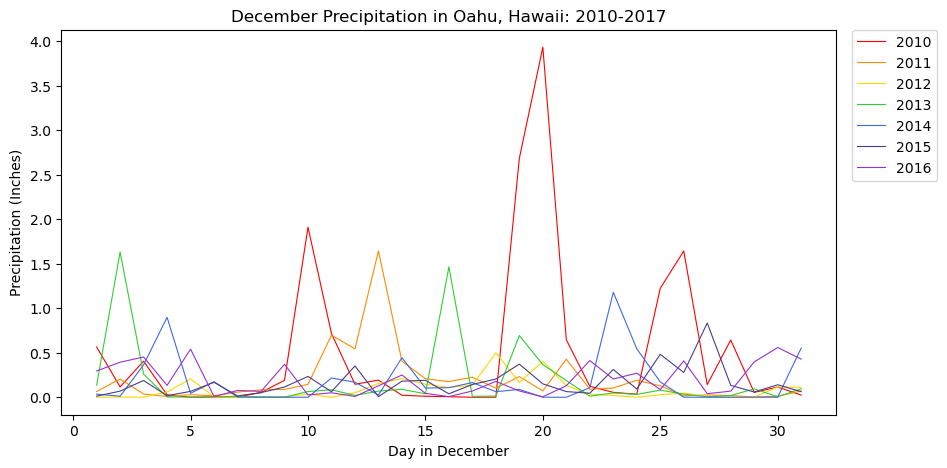

In [30]:
colors = ['red', 'darkorange', 'gold', 'limegreen', 'royalblue', 'darkslateblue', 'darkorchid']
dec_rain_plot_clean.plot('Day in December', ['2010', '2011', '2012', '2013', '2014', '2015', '2016'], figsize = (10, 5), linewidth=0.8, color=colors)
plt.title("December Precipitation in Oahu, Hawaii: 2010-2017")
plt.xlabel("Day in December")
plt.ylabel("Precipitation (Inches)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [31]:
dec_rain_plot_clean.describe()

,Day in December,2010,2011,2012,2013,2014,2015,2016
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,0.505766,0.197248,0.086268,0.179635,0.176168,0.165563,0.199009
std,9.092121,0.904945,0.315188,0.118896,0.391517,0.281319,0.170864,0.176389
min,1.000000,0.000000,0.003333,0.000000,0.000000,0.000000,0.006667,0.005000
25%,8.500000,0.023254,0.032232,0.001667,0.009375,0.000000,0.059833,0.057857
50%,16.000000,0.115714,0.090000,0.032857,0.038333,0.062857,0.134000,0.128571
75%,23.500000,0.603929,0.206250,0.134167,0.094643,0.172976,0.197143,0.381667
max,31.000000,3.931667,1.643750,0.498571,1.631667,1.178750,0.834000,0.558333


## Station Queries

In [32]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
station_results_june = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(
    extract('month', Measurement.date)==6).all()
station_june_df = pd.DataFrame(station_results_june, columns=['Date', 'June Temps'])
station_june_df.describe()

,June Temps
count,236.000000
mean,73.271186
std,2.989801
min,65.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,82.000000


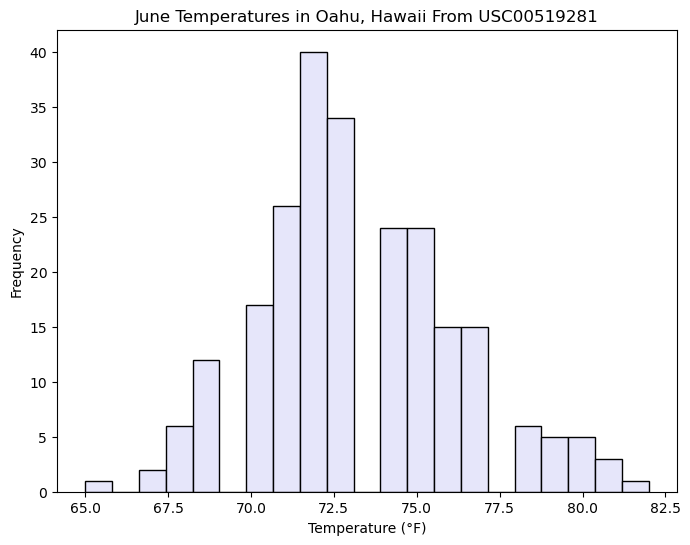

In [34]:
station_june_df.plot.hist(bins=21, color='lavender', edgecolor='black', legend=None, figsize=(8, 6))
plt.xlabel("Temperature (°F)")
plt.title("June Temperatures in Oahu, Hawaii From USC00519281")
plt.show()

In [35]:
station_june_plot = pd.DataFrame(station_june_df)
station_june_plot['Date'] = pd.to_datetime(station_june_plot['Date'])

station_june_2010_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2010].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2011_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2011].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2012_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2012].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2013_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2013].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2014_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2014].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2015_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2015].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2016_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2016].groupby(station_june_plot['Date'])['June Temps'].mean())
station_june_2017_df = pd.DataFrame(station_june_plot[station_june_plot['Date'].dt.year == 2017].groupby(station_june_plot['Date'])['June Temps'].mean())

station_june_plot_clean = station_june_2010_df
station_june_plot_clean.reset_index(inplace=True)
station_june_plot_clean['Date'] = station_june_plot_clean['Date'].dt.day
station_june_plot_clean.rename(columns={'Date': 'Day in June', 'June Temps': '2010'}, inplace=True)
station_june_plot_clean['Day in June'] = station_june_plot_clean['Day in June'].astype("int64")

station_june_2011_df.reset_index(inplace=True)
station_june_2012_df.reset_index(inplace=True)
station_june_2013_df.reset_index(inplace=True)
station_june_2014_df.reset_index(inplace=True)
station_june_2015_df.reset_index(inplace=True)
station_june_2016_df.reset_index(inplace=True)
station_june_2017_df.reset_index(inplace=True)
station_june_plot_clean['2011'] = station_june_2011_df['June Temps']
station_june_plot_clean['2012'] = station_june_2012_df['June Temps']
station_june_plot_clean['2013'] = station_june_2013_df['June Temps']
station_june_plot_clean['2014'] = station_june_2014_df['June Temps']
station_june_plot_clean['2015'] = station_june_2015_df['June Temps']
station_june_plot_clean['2016'] = station_june_2016_df['June Temps']
station_june_plot_clean['2017'] = station_june_2017_df['June Temps']
station_june_plot_clean.head()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
0,1,71.0,72.0,71.0,81.0,74.0,76.0,69.0,80.0
1,2,71.0,73.0,73.0,74.0,72.0,68.0,67.0,76.0
2,3,72.0,73.0,78.0,74.0,74.0,71.0,68.0,76.0
3,4,72.0,77.0,71.0,73.0,73.0,70.0,65.0,77.0
4,5,76.0,76.0,72.0,73.0,73.0,68.0,70.0,75.0


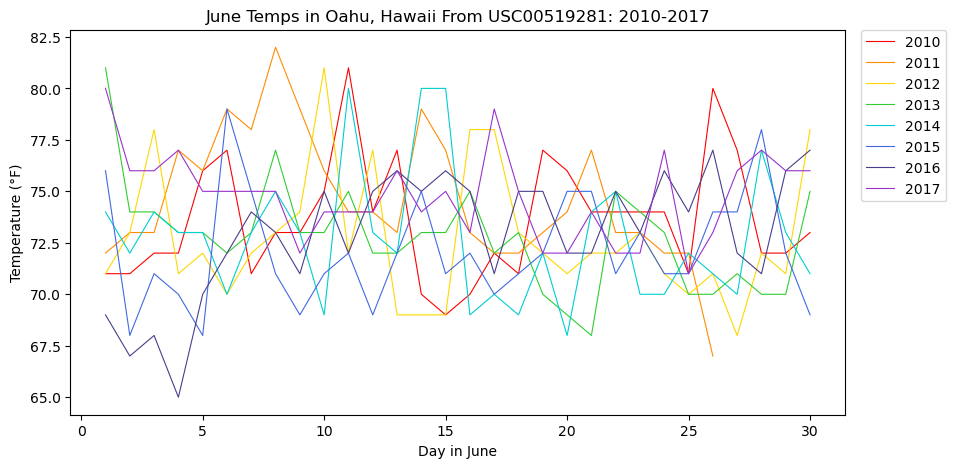

In [36]:
colors = ['red', 'darkorange', 'gold', 'limegreen', 'darkturquoise', 'royalblue', 'darkslateblue', 'darkorchid']
station_june_plot_clean.plot('Day in June', ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], figsize = (10, 5), linewidth=0.8, color=colors)
plt.title("June Temps in Oahu, Hawaii From USC00519281: 2010-2017")
plt.xlabel("Day in June")
plt.ylabel("Temperature (°F)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [37]:
station_june_plot_clean.describe()

,Day in June,2010,2011,2012,2013,2014,2015,2016,2017
count,30.000000,30.000000,26.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,73.633333,74.615385,72.700000,72.766667,72.733333,72.166667,72.966667,74.766667
std,8.803408,2.941772,3.200961,3.217945,2.568823,3.226328,2.755350,3.022711,2.128353
min,1.000000,69.000000,67.000000,68.000000,68.000000,68.000000,68.000000,65.000000,71.000000
25%,8.250000,71.250000,73.000000,71.000000,71.250000,70.000000,71.000000,71.250000,73.250000
50%,15.500000,73.000000,73.500000,72.000000,73.000000,72.500000,71.500000,73.500000,75.000000
75%,22.750000,75.750000,77.000000,73.000000,74.000000,74.000000,74.000000,75.000000,76.000000
max,30.000000,81.000000,82.000000,81.000000,81.000000,80.000000,79.000000,77.000000,80.000000
